# Wrangle and Analyze Data

The goal of this project is to wrangle (and analyze and visualize) data.

## Table of Contents
- [Introduction](#intro)
- [Part I - Gathering Data](#Data_gather)
- [Part II - Accessing Data - Visual and Programatic](#Data_access)
- [Part III - Cleaning Data](#Data_clean)
- [Part IV - Storing Data](#Data_store)
- [Part V - Analyzing and Visualizing Data](#Data_analyze)


<a id='intro'></a>
# Introduction

The goal of this project is to wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. WeRateDogs is a twitter account dedicated for posting tweets related to dogs and they have Professional Dog ratings.

The Twitter archive is great, but it only contains very basic tweet information like each tweet's text,tweet id , source, dog rating , name ,dog stage. Additional gathering, then assessing and cleaning is required for better analyses and visualizations. So we are also using retweet count , favourite count etc gathered from Twitter's API. We also use image predictin data obtained when every image in the WeRateDogs Twitter archive through a neural network that can classify breeds of dogs. 

The main tasks in this project are as follows:

Data wrangling, which consists of:
    Gathering data (downloadable file in the Resources tab in the left most panel of your classroom and linked in step 1 below).
    Assessing data
    Cleaning data
Storing, analyzing, and visualizing your wrangled data
Reporting on 1) your data wrangling efforts and 2) your data analyses and visualizations


Now let us start by importing necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import requests
import tweepy
from tweepy import OAuthHandler
import os
import json
from timeit import default_timer as timer
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<a id='Data_gather'></a>
## Gathering Data

In [3]:
# Reading the WeRateDogs Twitter archive
df_twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')

In [4]:
# Gather tweet image prediction data and reading it to a dataframe.
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
r = requests.get(url)
with open('./image_predictions.tsv', 'wb') as f:
        f.write(r.content)

df_image_pred = pd.read_csv('./image_predictions.tsv', sep='\t')

In [5]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions

consumer_key = 'XXXXXXXXXX'
consumer_secret = 'XXXXXXXXXX'
access_token = 'XXXXXXXXXXX'
access_secret = 'XXXXXXXXXXX'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [6]:
tweet_ids = df_twitter_archive.tweet_id.values
len(tweet_ids)

2356

In [7]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('./tweet_json.txt', 'w') as outfile:
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()

In [8]:
# Reading tweet_json.txt
df_twitter_json = pd.read_json('./tweet-json.txt', lines=True)

<a id='Data_access'></a>
## Accessing Data - Visual and Programatic

In [9]:
df_twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [10]:
df_twitter_archive.shape

(2356, 17)

In [11]:
df_twitter_archive.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

In [12]:
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [13]:
df_twitter_archive.tweet_id.duplicated().sum()

0

In [14]:
df_twitter_archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [15]:
df_twitter_archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [16]:
df_twitter_archive.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [17]:
df_twitter_archive[df_twitter_archive.doggo != 'None'].count()

tweet_id                      97
in_reply_to_status_id          4
in_reply_to_user_id            4
timestamp                     97
source                        97
text                          97
retweeted_status_id           10
retweeted_status_user_id      10
retweeted_status_timestamp    10
expanded_urls                 94
rating_numerator              97
rating_denominator            97
name                          97
doggo                         97
floofer                       97
pupper                        97
puppo                         97
dtype: int64

In [18]:
df_twitter_archive[df_twitter_archive.floofer != 'None'].count()

tweet_id                      10
in_reply_to_status_id          0
in_reply_to_user_id            0
timestamp                     10
source                        10
text                          10
retweeted_status_id            0
retweeted_status_user_id       0
retweeted_status_timestamp     0
expanded_urls                 10
rating_numerator              10
rating_denominator            10
name                          10
doggo                         10
floofer                       10
pupper                        10
puppo                         10
dtype: int64

In [19]:
df_twitter_archive.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [20]:
df_twitter_archive.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [21]:
(df_twitter_archive.rating_numerator/df_twitter_archive.rating_denominator).value_counts()

1.200000      562
1.100000      469
1.000000      463
1.300000      351
0.900000      157
0.800000      102
0.700000       54
1.400000       54
0.500000       38
0.600000       32
0.300000       19
0.400000       15
0.200000       11
0.100000        8
42.000000       2
1.500000        2
0.000000        2
7.500000        2
0.818182        2
1.250000        1
66.600000       1
inf             1
1.700000        1
3.428571        1
0.636364        1
2.700000        1
0.733333        1
2.600000        1
18.200000       1
177.600000      1
dtype: int64

In [22]:
df_twitter_archive[(df_twitter_archive.rating_numerator/df_twitter_archive.rating_denominator) > 10]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,194351775.0,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,13615722.0,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,21955058.0,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
979,749981277374128128,NaN,NaN,2016-07-04 15:00:45 +0000,"<a href=""https://about.twitter.com/products/tw...",This is Atticus. He's quite simply America af....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/749981277...,1776,10,Atticus,None,None,None,None
2074,670842764863651840,NaN,NaN,2015-11-29 05:52:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After so many requests... here you go.\n\nGood...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670842764...,420,10,None,None,None,None,None


Quality Issues : 

1. Too many missing values in in_reply_to_status_id,in_reply_to_user_id, retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp.
2. Many values in doggo, floofer, pupper, puppo are 'None'. This should be NaN instead.
3. Datatype of timestamp and retweeted_status_timestamp should be timestamp or datetime.
4. Incorrect values in rating_denominator column. One id has rating_denominator value as 0, which cannot be true.
5. Some values in name field like 'None','actually','unacceptable','this','O' etc doesn't seem logical. Values could be incorrect.
6. rating_numerator 420,666,182,1776 will result in a rating(rating_numerator/rating_denominator) greater than 10 ( considering that the rating is in a scale of 10)

Tidiness Issues :

1. It appears that doggo,floofer,pupper,puppo denotes different stages of dogs and could be stored under a single column. Or else, we can denote them using a 0 or 1 in the above 4 columns to make it tidier.

II. Access data quality and tidiness of  tweet image predictions data.

In [23]:
df_image_pred.shape

(2075, 12)

In [24]:
df_image_pred.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [25]:
df_image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [26]:
df_image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


Quality Issue: 

1. This dataset contains only 2075 rows whereas the main twitter archive has 2356 records. Some twitter ids might be missing predictions.

III. Access data quality and tidiness of  tweet's json data'

In [27]:
df_twitter_json.shape

(2354, 31)

In [28]:
df_twitter_json.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,0.0,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,NaN,...,0.0,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,0.0,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,NaN,...,0.0,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,NaN,...,0.0,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [29]:
df_twitter_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2354 non-null datetime64[ns]
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null float64
id                               2354 non-null int64
id_str                           2354 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

In [30]:
df_twitter_json.id.duplicated().sum()

0

Quality Issues: 
    
1. Dataset contains too many columns with null values.
2. Some id's in twitter archive data is missing json response data.

Tidiness Issues: 
    
1. All datasets have to be joined.

<a id='Data_clean'></a>
# Cleaning Data

#### Define

#### Code

In [31]:
df_twitter_archive_bkp = df_twitter_archive.copy()
df_image_pred_bkp = df_image_pred.copy()
df_twitter_json_bkp = df_twitter_json.copy()

#### Test

In [32]:
df_twitter_archive_bkp.shape

(2356, 17)

In [33]:
df_image_pred_bkp.shape

(2075, 12)

In [34]:
df_twitter_json_bkp.shape

(2354, 31)

#### Define

#### Code

In [35]:
df_twitter_json1 = df_twitter_json[['id','retweet_count','favorite_count']]

#### Test

In [36]:
df_twitter_json1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [37]:
df_twitter_json1.head()

,id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


In [38]:
df_twitter_json1[df_twitter_json1.retweet_count == 0]

,id,retweet_count,favorite_count
290,838085839343206401,0,150


#### Define

Fix datatype issues in df_twitter_archive

#### Code

In [39]:
 df_twitter_archive.timestamp = pd.to_datetime(df_twitter_archive.timestamp)

In [40]:
 df_twitter_archive.retweeted_status_timestamp = pd.to_datetime(df_twitter_archive.retweeted_status_timestamp)

#### Test

In [41]:
df_twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns, UTC]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null datetime64[ns, UTC]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes

#### Define

Fix rating_numerator and rating_denominator data issues in df_twitter_archive

#### Code

In [42]:
df_twitter_archive.shape

(2356, 17)

In [43]:
df_twitter_archive.drop(df_twitter_archive[df_twitter_archive['rating_denominator'] == 0 ].index, inplace = True)

In [44]:
df_twitter_archive.drop(df_twitter_archive[(df_twitter_archive.rating_numerator/df_twitter_archive.rating_denominator ) > 10 ].index, inplace = True)

#### Test

In [45]:
df_twitter_archive.shape

(2350, 17)

In [46]:
(df_twitter_archive.rating_numerator/df_twitter_archive.rating_denominator).value_counts()

1.200000    562
1.100000    469
1.000000    463
1.300000    351
0.900000    157
0.800000    102
0.700000     54
1.400000     54
0.500000     38
0.600000     32
0.300000     19
0.400000     15
0.200000     11
0.100000      8
0.818182      2
7.500000      2
0.000000      2
1.500000      2
1.700000      1
3.428571      1
0.733333      1
0.636364      1
2.600000      1
1.250000      1
2.700000      1
dtype: int64

#### Define

Combine datasets

#### Code

In [47]:
df_tweet = pd.merge(df_twitter_archive, df_image_pred, how = 'inner', on = 'tweet_id')

In [48]:
df_tweet = pd.merge(df_tweet,df_twitter_json1,how = 'inner',left_on='tweet_id',right_on='id')

#### Test

In [49]:
df_tweet.shape

(2071, 31)

In [50]:
df_tweet.tweet_id.duplicated().sum()

0

In [51]:
df_tweet.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,id,retweet_count,favorite_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,...,False,bagel,0.085851,False,banana,0.076110,False,892420643555336193,8853,39467
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,...,True,Pekinese,0.090647,True,papillon,0.068957,True,892177421306343426,6514,33819
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,...,True,malamute,0.078253,True,kelpie,0.031379,True,891815181378084864,4328,25461
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557...,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,891689557279858688,8964,42908
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891327558...,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,891327558926688256,9774,41048


In [52]:
df_tweet.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'id', 'retweet_count',
       'favorite_count'],
      dtype='object')

#### Define

Dropping id column

#### Code

In [53]:
df_tweet.drop(columns=['id'],axis=1,inplace=True)

#### Test

In [54]:
df_tweet.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'retweet_count', 'favorite_count'],
      dtype='object')

#### Define

Fixing issue with the dog stage
from tweet_archive dataset. Combining doggo,floofer,pupper,puppo into a single column.

#### Code

In [55]:
df_tweet.puppo.value_counts()

None     2047
puppo      24
Name: puppo, dtype: int64

In [56]:
df_tweet[df_tweet.doggo == "doggo"]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/890240255...,...,0.511319,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,7711,32467
38,884162670584377345,NaN,NaN,2017-07-09 21:29:42+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Yogi. He doesn't have any important dog m...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/884162670...,...,0.707046,True,malinois,0.199396,True,Norwegian_elkhound,0.049148,True,3128,20771
84,872967104147763200,NaN,NaN,2017-06-09 00:02:31+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a very large dog. He has a date later. ...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/872967104...,...,0.476913,True,Chesapeake_Bay_retriever,0.174145,True,German_short-haired_pointer,0.092861,True,5669,28031
92,871515927908634625,NaN,NaN,2017-06-04 23:56:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Napolean. He's a Raggedy East Nicaragu...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/871515927...,...,0.974781,True,briard,0.020041,True,swab,0.003228,False,3628,20730
101,869596645499047938,NaN,NaN,2017-05-30 16:49:31+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Scout. He just graduated. Officially a...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/869596645...,...,0.955156,True,toy_terrier,0.008054,True,muzzle,0.006296,False,3327,16476
143,858843525470990336,NaN,NaN,2017-05-01 00:40:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",I have stumbled puppon a doggo painting party....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/858843525...,...,0.578120,True,Labrador_retriever,0.286059,True,bloodhound,0.026917,True,3771,16304
154,855851453814013952,NaN,NaN,2017-04-22 18:31:02+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo participating in the #ScienceMa...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/855851453...,...,0.321676,True,Labrador_retriever,0.115138,True,groenendael,0.096100,True,19196,47844
160,854010172552949760,NaN,NaN,2017-04-17 16:34:26+00:00,"<a href=""http://twitter.com/download/iphone"" r...","At first I thought this was a shy doggo, but i...",NaN,NaN,NaT,https://twitter.com/dog_rates/status/854010172...,...,0.354733,True,collie,0.177538,True,Border_collie,0.131706,True,3433,17169
170,851953902622658560,NaN,NaN,2017-04-12 00:23:33+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Astrid. She's a guide d...,8.293743e+17,4.196984e+09,2017-02-08 17:00:26+00:00,https://twitter.com/dog_rates/status/829374341...,...,0.757547,True,American_Staffordshire_terrier,0.149950,True,Chesapeake_Bay_retriever,0.047523,True,10706,0
194,846514051647705089,NaN,NaN,2017-03-28 00:07:32+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Barney. He's an elder doggo. Hitches a...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/846514051...,...,0.650003,True,Leonberg,0.065199,True,Norfolk_terrier,0.052955,True,13076,48410


In [57]:
df_tweet['dog_type'] = np.nan
df_tweet.loc[df_tweet.doggo == "doggo", 'dog_type'] = "doggo"
df_tweet.loc[df_tweet.floofer == "floofer", 'dog_type'] = "floofer"
df_tweet.loc[df_tweet.pupper == "pupper", 'dog_type'] = "pupper"
df_tweet.loc[df_tweet.puppo == "puppo", 'dog_type'] = "puppo"

In [58]:
#Null type is given the value 'other'
df_tweet.loc[df_tweet.dog_type.isna(), 'dog_type'] = "other"

In [59]:
df_tweet.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'],axis=1,inplace=True)

#### Test

In [60]:
df_tweet.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'jpg_url', 'img_num', 'p1', 'p1_conf',
       'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog',
       'retweet_count', 'favorite_count', 'dog_type'],
      dtype='object')

In [61]:
df_tweet.dog_type.value_counts()

other      1751
pupper      221
doggo        67
puppo        24
floofer       8
Name: dog_type, dtype: int64

In [62]:
df_tweet[~df_tweet.dog_type.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,dog_type
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,...,False,bagel,0.085851,False,banana,0.076110,False,8853,39467,other
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,...,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819,other
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,...,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461,other
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557...,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964,42908,other
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891327558...,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048,other
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891087950...,...,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,3261,20562,other
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaT,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",...,True,Border_collie,0.199287,True,ice_lolly,0.193548,False,2158,12041,other
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/890729181...,...,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,16716,56848,other
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/890609185...,...,True,Irish_setter,0.193054,True,Chesapeake_Bay_retriever,0.118184,True,4429,28226,other
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/890240255...,...,True,Cardigan,0.451038,True,Chihuahua,0.029248,True,7711,32467,doggo


#### Define

Fixing issue with the dog name.

#### Code

In [63]:
df_tweet.name.nunique()

936

In [64]:
df_tweet.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'such', 'Canela',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Steven', 'Beau', 'Snoopy', 'Shadow', 'Emmy',
       'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti',
       'Goose', 'Nugget', 'Cash', 'Jed', 'Sebastian', 'Walter', 'Sierra',
       'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover', 'Napolean', 'Boomer',
       'Cody', 'Rumble', 'Clifford', 'Dewey', 'Scout', 'Gizmo', 'Cooper',
       'Harold', 'Shikha', 'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball',
       'Paisley', 'Albus', 'Neptune', 'Belle', 'Quinn', 'Zooey', 'Da

In [65]:
invalid_name_list = ['None',
'a',
'O',
'an',
'not',
'his',
'getting',
'this',
'unacceptable',
'all',
'infuriating',
'Fillup',
'by',
'officially',
'such',
'the']

In [66]:
df_tweet_bkp = df_tweet.copy()

In [67]:
for names in invalid_name_list:
    df_tweet.loc[df_tweet.name == names,'name'] = "UNKNOWN"

#### Test

In [68]:
df_tweet[df_tweet.name == 'UNKNOWN']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,dog_type
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891087950...,...,True,Irish_terrier,0.116317,True,Indian_elephant,0.076902,False,3261,20562,other
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/890729181...,...,True,Eskimo_dog,0.178406,True,Pembroke,0.076507,True,16716,56848,other
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here's a puppo that seems to be on the fence a...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/889665388...,...,True,Cardigan,0.027356,True,basenji,0.004633,True,8538,38818,puppo
21,887517139158093824,NaN,NaN,2017-07-19 03:39:09+00:00,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/887517139...,...,False,tow_truck,0.029175,False,shopping_cart,0.026321,False,12082,46959,other
23,887343217045368832,NaN,NaN,2017-07-18 16:08:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",You may not have known you needed to see this ...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/887343217...,...,True,sea_lion,0.275645,False,Weimaraner,0.134203,True,10737,34222,other
24,887101392804085760,NaN,NaN,2017-07-18 00:07:08+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This... is a Jubilant Antarctic House Bear. We...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/887101392...,...,True,Eskimo_dog,0.035029,True,Staffordshire_bullterrier,0.029705,True,6167,31061,other
33,885167619883638784,NaN,NaN,2017-07-12 16:03:00+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a corgi undercover as a malamute....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/885167619...,...,True,Siberian_husky,0.071712,True,Eskimo_dog,0.055770,True,4556,22367,other
37,884441805382717440,NaN,NaN,2017-07-10 15:58:53+00:00,"<a href=""http://twitter.com/download/iphone"" r...","I present to you, Pup in Hat. Pup in Hat is gr...",NaN,NaN,NaT,https://twitter.com/dog_rates/status/884441805...,...,True,Cardigan,0.003216,True,Chihuahua,0.002081,True,5856,27478,other
42,883117836046086144,NaN,NaN,2017-07-07 00:17:54+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Please only send dogs. We don't rate mechanics...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/883117836...,...,True,Labrador_retriever,0.045948,True,kuvasz,0.002471,True,6949,37914,other
50,881536004380872706,NaN,NaN,2017-07-02 15:32:16+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/881536004...,...,True,Angora,0.272066,False,Persian_cat,0.114854,False,16570,50199,pupper


<a id='Data_store'></a>
## Storing Data

In [69]:
df_tweet.to_csv(r'twitter_archive_master.csv',index=False)

<a id='Data_analyze'></a>
## Analyzing and Visualizing Data

In [70]:
df_tweet.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,retweet_count,favorite_count,dog_type
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,...,False,bagel,0.085851,False,banana,0.076110,False,8853,39467,other
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,...,True,Pekinese,0.090647,True,papillon,0.068957,True,6514,33819,other
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,...,True,malamute,0.078253,True,kelpie,0.031379,True,4328,25461,other
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557...,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,8964,42908,other
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891327558...,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,9774,41048,other


### Questions asked :
    1. Number of dogs in each stage.
    2. Ratings with respect to tweets  
    3. Tweet images that were predicted correctly as dogs.
    4. Does higher retweet result in higher number of favourites?
    5. Which is the major source of tweet in WeRateDogs twitter account ?

#### Number of Dogs in each stage

In [71]:
dog_stage = df_tweet.groupby('dog_type').tweet_id.count()
dog_stage.sort_values(inplace=True)

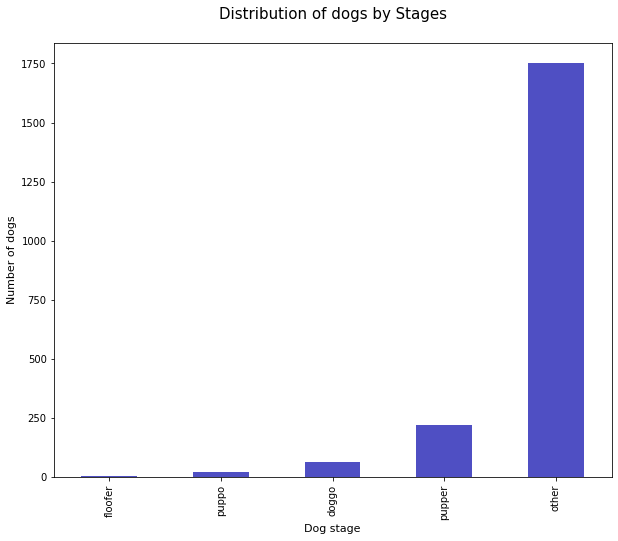

In [72]:
plt.figure(figsize=[10,8])
dog_stage.plot.bar(x = dog_stage.index,y = dog_stage.values, color='#0504aa', width = 0.5,alpha=0.7)
plt.xlabel('Dog stage',fontsize=11)
plt.ylabel('Number of dogs',fontsize=11)
plt.title('Distribution of dogs by Stages\n',fontsize=15)
plt.show()

Dog stage of majority of dogs are unknown and are categorized as 'other'

#### Ratings w.r.t to tweets

Rating of a tweet is calculated as rating_numerator/rating_denomiantor on a scale of 0-10.

In [73]:
df_tweet['rating'] = round(df_tweet.rating_numerator/df_tweet.rating_denominator,2)

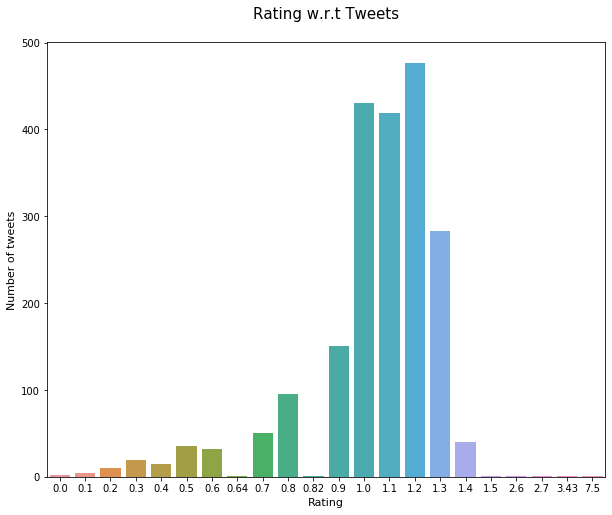

In [74]:
plt.figure(figsize=[10,8])
sns.countplot(data = df_tweet, x='rating')
plt.ylabel('Number of tweets',fontsize=11)
plt.xlabel('Rating',fontsize=11)
plt.title('Rating w.r.t Tweets\n',fontsize=15)
plt.show()

Maximum number of tweets have ratings within the range 0.9 and 1.3. With most tweets having a rating of 1.2

#### NN Prediction of Tweet images 

Number of tweets predicted correctly as dogs.

In [75]:
# Creating a new column in the df_tweet with TRUE value if the NN predicted TRUE in either #1,#2 or #3rd prediction. i.e tweets where Neural network failed to predict that the image is a dog. 

In [76]:
df_tweet['pred_dog'] = False
df_tweet.loc[(df_tweet.p1_dog == True) | (df_tweet.p2_dog == True) | (df_tweet.p3_dog == True),'pred_dog'] = True

In [77]:
df_tweet['pred1_dog'] = False
df_tweet.loc[(df_tweet.p1_dog == True),'pred1_dog'] = True
df_tweet['pred2_dog'] = False
df_tweet.loc[(df_tweet.p1_dog == False) & (df_tweet.p2_dog == True),'pred2_dog'] = True
df_tweet['pred3_dog'] = False
df_tweet.loc[(df_tweet.p1_dog == False) & (df_tweet.p2_dog == False) & (df_tweet.p3_dog == True),'pred3_dog'] = True

In [78]:
print(df_tweet[df_tweet.pred_dog == True].tweet_id.count())
print(df_tweet[df_tweet.pred1_dog == True].tweet_id.count())
print(df_tweet[df_tweet.pred2_dog == True].tweet_id.count())
print(df_tweet[df_tweet.pred3_dog == True].tweet_id.count())

1750
1531
155
64


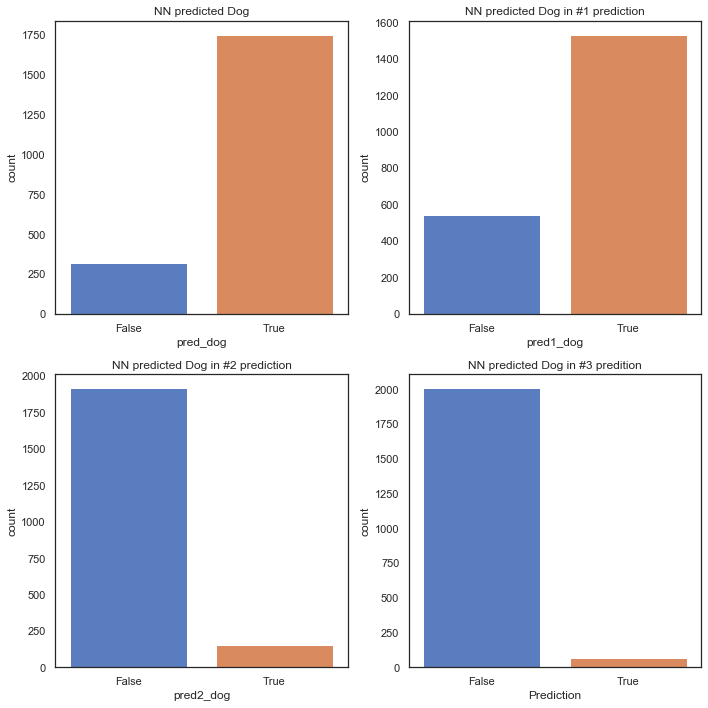

In [79]:
sns.set(style="white", palette="muted", color_codes=True)
fig, axs = plt.subplots(2, 2,figsize=(10, 10))
sns.countplot(data = df_tweet, x='pred_dog', ax = axs[0,0])
axs[0, 0].set_title('NN predicted Dog')
plt.xlabel('Prediction')
plt.text
sns.countplot(data = df_tweet, x='pred1_dog', ax = axs[0,1])
axs[0, 1].set_title('NN predicted Dog in #1 prediction')
plt.xlabel('Prediction')
sns.countplot(data = df_tweet, x='pred2_dog',  ax = axs[1,0])
axs[1, 0].set_title('NN predicted Dog in #2 prediction')
plt.xlabel('Prediction')
sns.countplot(data = df_tweet, x='pred3_dog', ax = axs[1,1])
axs[1, 1].set_title('NN predicted Dog in #3 predition')
plt.xlabel('Prediction')
plt.tight_layout()

It can be deduced that around 1500 tweet images were correctly predicted as Dogs in the first prediction itself. 
From the 3rd subplot, it can be seen that less than 100 images were predicted incorrectly in the first prediction, but correct prediction was made second time. 
Similarly very less images were wrongly predicted in the first and second prediction and right prediction was made in th 3rd prediction. 

We can infer that most of the tweet images were predicted as dogs correctly in the first prediction itself. This indicates that the correctness of the neural network. It can also be noticed that for 300(approximately) images, the neural network failed to predict that the image is a dog

#### Does higher retweet attribute to higher favourites ??

This can be understood from the correlatin between retweet_count and favourite_count

Text(0, 0.5, 'Favorite count')

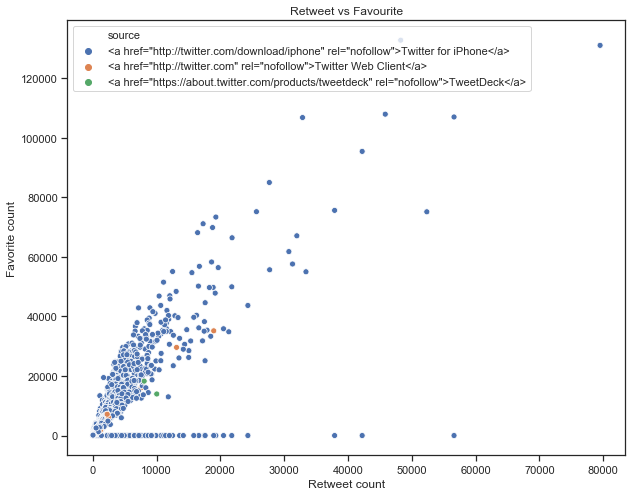

In [80]:
plt.figure(figsize=[10,8])
sns.set(style="ticks")
sns.scatterplot(x=df_tweet.retweet_count, y=df_tweet.favorite_count, hue = df_tweet.source,
               data=df_tweet )
plt.title("Retweet vs Favourite")
plt.xlabel('Retweet count')
plt.ylabel('Favorite count')

There is a positive correlation between the number of retweets and the count of favourite. i.e., as the retweet increases, number of favourite also increases.

#### Which is the major source of tweets in WeRateDogs account ?

In [81]:
twitter_source = df_tweet.source.value_counts()
twitter_source

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2031
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       30
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      10
Name: source, dtype: int64

Most tweets were made from 'Twitter for iPhone'